In [ ]:
!pip install pandas numpy scikit-learn wordcloud matplotlib

In [53]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
RU = 3572113

df = pd.read_csv('pre-processed.csv')

print(df.head())

def preprocess_text(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'\d+', '', text)  # Remover números
    text = re.sub(r'[^\w\s]', '', text)  # Remover pontuações
    return text

df['preprocessed_news'] = df['preprocessed_news'].apply(preprocess_text)

X = df['preprocessed_news']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, # 25% para teste
    random_state=1
)

df_train = pd.DataFrame({'text': X_train, 'label': y_train})
df_test = pd.DataFrame({'text': X_test, 'label': y_test})

df_train_fake = df_train[df_train['label'] == 'fake']
df_train_real = df_train[df_train['label'] == 'true']

print(f'Tamanho FAKE no treinamento: {len(df_train_fake)}')
print(f'Tamanho REAL no treinamento: {len(df_train_real)}')

min_length_train = min(len(df_train_fake), len(df_train_real))
df_train_fake_balanced = df_train_fake.sample(n=min_length_train, random_state=1)
df_train_real_balanced = df_train_real.sample(n=min_length_train, random_state=1)

df_train_balanced = pd.concat([df_train_fake_balanced, df_train_real_balanced])

print(f'Tamanho balanceado FAKE no treinamento: {len(df_train_fake_balanced)}')
print(f'Tamanho balanceado REAL no treinamento: {len(df_train_real_balanced)}')

X_train_balanced = df_train_balanced['text']
y_train_balanced = df_train_balanced['label']

print(f'Primeiras linhas do treinamento balanceado:\n{df_train_balanced.head()}')


   index label                                  preprocessed_news
0      0  fake  katia abreu diz vai colocar expulsao moldura n...
1      1  fake  ray peita bolsonaro conservador fake entrevist...
2      2  fake  reinaldo azevedo desmascarado policia federal ...
3      3  fake  relatorio assustador bndes mostra dinheiro pub...
4      4  fake  radialista americano fala sobre pt vendem ilus...
Tamanho FAKE no treinamento: 2717
Tamanho REAL no treinamento: 2683
Tamanho balanceado FAKE no treinamento: 2683
Tamanho balanceado REAL no treinamento: 2683
Primeiras linhas do treinamento balanceado:
                                                   text label
1440  desabafa brasil feliz hoje deve mim neymar apo...  fake
796   barril polvora partir hs amanha agentes penite...  fake
3547  fracos valdemiro lanca desafio fieis pede dizi...  fake
844   medico comete abuso abominavel menina anos voc...  fake
3256  neymar recebe perdao receita federal divida as...  fake


In [55]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3)) 
X_train_tfidf = vectorizer.fit_transform(X_train_balanced)
X_test_tfidf = vectorizer.transform(X_test)

In [56]:
num_features = X_train_tfidf.shape[1]
print(f'Número de características (palavras, bigramas e trigramas): {num_features}')

Número de características (palavras, bigramas e trigramas): 3000687


In [57]:
fake_texts = df[df['label'] == 'fake']['preprocessed_news']
all_fake_texts = ' '.join(fake_texts)
vectorizer_fake = TfidfVectorizer(ngram_range=(1, 3))
X_fake_tfidf = vectorizer_fake.fit_transform(fake_texts)
num_features_fake = X_fake_tfidf.shape[1]
print(f'Número de características (palavras, bigramas e trigramas) para textos FAKE: {num_features_fake}')

Número de características (palavras, bigramas e trigramas) para textos FAKE: 658958


In [58]:
true_texts = df[df['label'] == 'true']['preprocessed_news']
all_true_texts = ' '.join(true_texts)
vectorizer_true = TfidfVectorizer(ngram_range=(1, 3))
X_true_tfidf = vectorizer_true.fit_transform(true_texts)
num_features_true = X_true_tfidf.shape[1]
print(f'Número de características (palavras, bigramas e trigramas) para textos TRUE: {num_features_true}')


Número de características (palavras, bigramas e trigramas) para textos TRUE: 3311926


In [59]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train_balanced)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


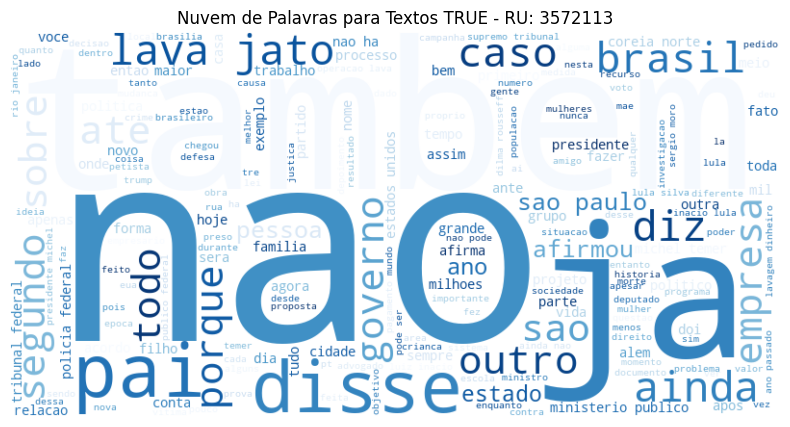

In [60]:
true_texts = df[df['label'] == 'true']['preprocessed_news']
all_true_texts = ' '.join(true_texts)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(all_true_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nuvem de Palavras para Textos TRUE - RU: 3572113')
plt.show()

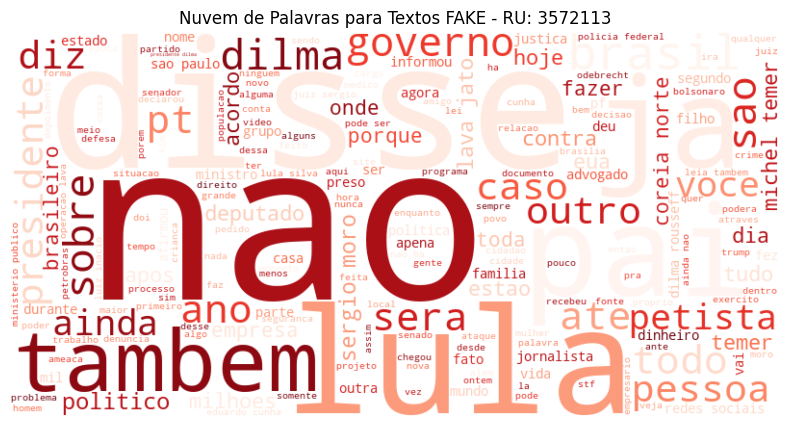

In [61]:
true_texts = df[df['label'] == 'fake']['preprocessed_news']
all_true_texts = ' '.join(true_texts)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_true_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nuvem de Palavras para Textos FAKE - RU: 3572113')
plt.show()